### CLUSTERING ANALYSIS ON COUNTRY DATASET USING MEANSHIFT

In [8]:
# Importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from matplotlib.colors import Normalize

In [9]:
# sklearn package for machine learning in python:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

In [10]:
# This reads data .csv file in a folder
df = pd.read_csv(r"C:\Users\NewUser\Desktop\Assignment AI\country_data.csv")

In [102]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [103]:
# This duplicates the data set 'df1
df1=df.copy()

In [20]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [21]:
# This removes all the null values in the dataset
df1.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [22]:
# This sums up all the columns to show the null values in the data set
df1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [23]:
# This gives more description of the null values in the data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [24]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [25]:
# X = df[['child_mort']]
# y = df.[['health']]
X = df.iloc[:, [1, 3]]

In [26]:
X

,child_mort,health
0,90.2,7.58
1,16.6,6.55
2,27.3,4.17
3,119.0,2.85
4,10.3,6.03
...,...,...
162,29.2,5.25
163,17.1,4.91
164,23.3,6.84
165,56.3,5.18


In [27]:
# This constructs the model
MS1= MeanShift()

In [30]:
MS1.fit(X)

MeanShift()

In [31]:
MS1.cluster_centers_

array([[ 13.09439252,   7.17476636],
       [ 61.92068966,   5.67310345],
       [ 97.80416667,   6.41541667],
       [141.5       ,   6.13666667],
       [208.        ,   6.91      ]])

In [32]:
centroids = MS1.cluster_centers_

In [33]:
centroids

array([[ 13.09439252,   7.17476636],
       [ 61.92068966,   5.67310345],
       [ 97.80416667,   6.41541667],
       [141.5       ,   6.13666667],
       [208.        ,   6.91      ]])

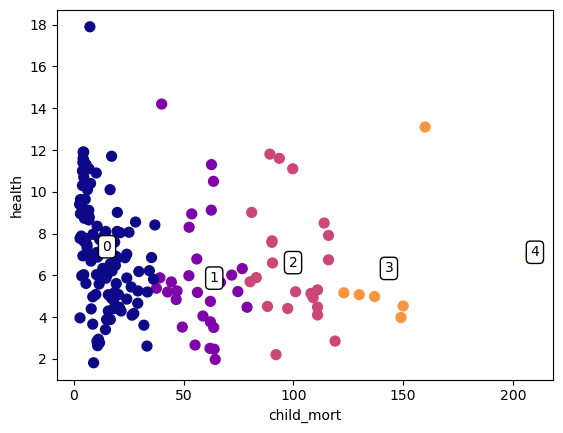

In [34]:
# This Visualises the result
fig, ax = plt.subplots()

# This stores the normalisation of the color encodings based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centroids)-1)

# This plots the clustered data
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c = MS1.predict(X), s = 50, cmap = 'plasma', norm = nm)

# This plots the centroids using a for loop
for i in range(centroids.shape[0]):
    ax.text(centroids[i, 0],centroids[i, 1], str(i), c = 'black',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))

ax.set_xlabel('child_mort')
ax.set_ylabel('health')

fig.savefig('cluster_plot.png')


### 2nd model

In [35]:
# X = df[['exports']]
# y = df.[['gdpp']]
X = df1.iloc[:, [2, 9]]

In [36]:
X

,exports,gdpp
0,10.0,553
1,28.0,4090
2,38.4,4460
3,62.3,3530
4,45.5,12200
...,...,...
162,46.6,2970
163,28.5,13500
164,72.0,1310
165,30.0,1310


In [37]:
# This constructs the model
MS3= MeanShift()

In [38]:
MS3.fit(X)

MeanShift()

In [39]:
centroids = MS3.cluster_centers_

In [40]:
centroids

array([[3.51991920e+01, 4.16731200e+03],
       [5.53473684e+01, 4.39578947e+04],
       [5.38705882e+01, 2.67647059e+04],
       [6.31500000e+01, 7.24500000e+04],
       [1.75000000e+02, 1.05000000e+05],
       [3.97000000e+01, 8.78000000e+04]])

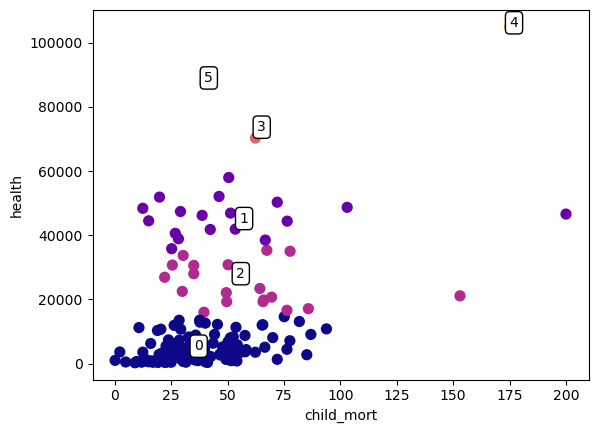

In [41]:
# This Visualises the result
fig, ax = plt.subplots()

# This stores the normalisation of the color encodings based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centroids)-1)

# This plots the clustered data
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c = MS3.predict(X), s = 50, cmap = 'plasma', norm = nm)

# This plots the centroids using a for loop
for i in range(centroids.shape[0]):
    ax.text(centroids[i, 0],centroids[i, 1], str(i), c = 'black',
    bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))

ax.set_xlabel('child_mort')
ax.set_ylabel('health')

fig.savefig('cluster_plot.png')


### This section plots for more than one feature

In [55]:
X = df.iloc[:, [3, 7, 8]]

In [56]:
X

,health,life_expec,total_fer
0,7.58,56.2,5.82
1,6.55,76.3,1.65
2,4.17,76.5,2.89
3,2.85,60.1,6.16
4,6.03,76.8,2.13
...,...,...,...
162,5.25,63.0,3.50
163,4.91,75.4,2.47
164,6.84,73.1,1.95
165,5.18,67.5,4.67


In [57]:
# This tells algorithm the number of clusters it should look for
MS2 = MeanShift()

In [78]:
MS2.fit(X)

MeanShift()

In [79]:
MS2.cluster_centers_

array([[ 7.20297872, 76.61702128,  2.00489362],
       [ 5.87488372, 61.48372093,  4.72534884],
       [11.1       , 46.5       ,  3.3       ],
       [ 6.91      , 32.1       ,  3.33      ]])

In [80]:
centroids1 = MS2.cluster_centers_

In [81]:
centroids1

array([[ 7.20297872, 76.61702128,  2.00489362],
       [ 5.87488372, 61.48372093,  4.72534884],
       [11.1       , 46.5       ,  3.3       ],
       [ 6.91      , 32.1       ,  3.33      ]])

C:\Users\NewUser\AppData\Local\Temp\ipykernel_5400\833414892.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


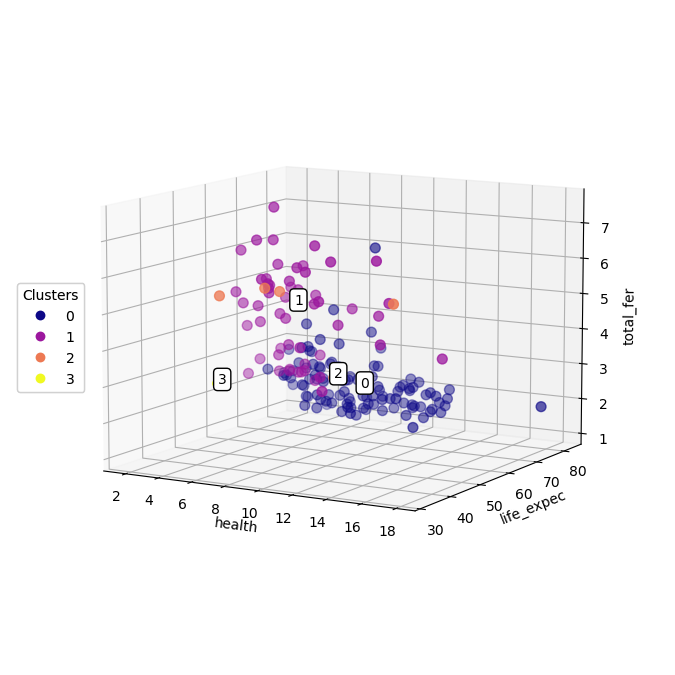

In [82]:
# This Visualises the result in a 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

# This stores the normalisation of the color encodings
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centroids1)-1)

# This plots the clustered data
scatter1 = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:,2],
c = MS2.predict(X), s = 50, cmap = 'plasma', norm = nm)

# This plos  the centroids using a for loop
for i in range(centroids1.shape[0]):
    ax.text(centroids1[i, 0], centroids1[i, 1], centroids1[i, 2],
    str(i), c = 'black',
    bbox=dict(boxstyle="round", facecolor='white',
    edgecolor='black'))
ax.azim = -60
ax.dist = 12
ax.elev = 10

# This makes sure you choose the correct column names here!!!
ax.set_xlabel(df.columns[3])
ax.set_ylabel(df.columns[7])
ax.set_zlabel(df.columns[8])

# This produces a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
loc="center left", title="Clusters")
ax.add_artist(legend1)
fig.tight_layout(pad=-2.0)

fig.savefig('cluster_3Dplot.png')

In [83]:
X = df.iloc[:, [4, 5, 6]]

In [84]:
X

,imports,income,inflation
0,44.9,1610,9.44
1,48.6,9930,4.49
2,31.4,12900,16.10
3,42.9,5900,22.40
4,58.9,19100,1.44
...,...,...,...
162,52.7,2950,2.62
163,17.6,16500,45.90
164,80.2,4490,12.10
165,34.4,4480,23.60


In [85]:
# This tells algorithm the number of clusters it should look for
MS4= MeanShift()

In [86]:
MS4.fit(X)

MeanShift()

In [87]:
MS4.cluster_centers_

array([[4.55510633e+01, 6.45470642e+03, 9.39784404e+00],
       [4.63900000e+01, 3.67866667e+04, 3.63796667e+00],
       [4.03000000e+01, 5.62000000e+04, 4.99675000e+00],
       [7.74666667e+01, 7.59666667e+04, 9.28466667e+00],
       [1.42000000e+02, 9.17000000e+04, 3.62000000e+00],
       [2.38000000e+01, 1.25000000e+05, 6.98000000e+00]])

In [88]:
centroids=MS4.cluster_centers_

In [89]:
centroids

array([[4.55510633e+01, 6.45470642e+03, 9.39784404e+00],
       [4.63900000e+01, 3.67866667e+04, 3.63796667e+00],
       [4.03000000e+01, 5.62000000e+04, 4.99675000e+00],
       [7.74666667e+01, 7.59666667e+04, 9.28466667e+00],
       [1.42000000e+02, 9.17000000e+04, 3.62000000e+00],
       [2.38000000e+01, 1.25000000e+05, 6.98000000e+00]])

C:\Users\NewUser\AppData\Local\Temp\ipykernel_5400\76996465.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


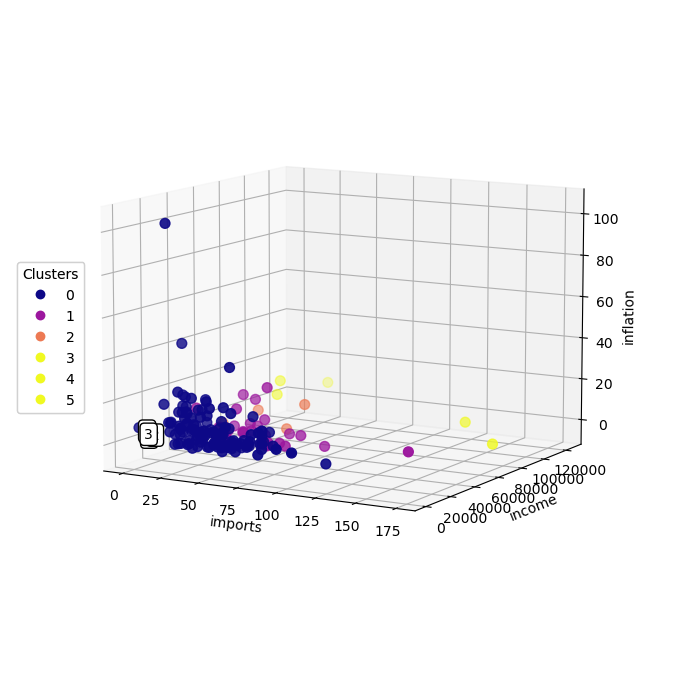

In [90]:
# This Visualises the result in a 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

# This stores the normalisation of the color encodings
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centroids1)-1)

# This plots the clustered data
scatter1 = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:,2],
c = MS4.predict(X), s = 50, cmap = 'plasma', norm = nm)

# This plos  the centroids using a for loop
for i in range(centroids1.shape[0]):
    ax.text(centroids1[i, 0], centroids1[i, 1], centroids1[i, 2],
    str(i), c = 'black',
    bbox=dict(boxstyle="round", facecolor='white',
    edgecolor='black'))
ax.azim = -60
ax.dist = 12
ax.elev = 10

# This makes sure you choose the correct column names here!!!
ax.set_xlabel(df.columns[4])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[6])

# This produces a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
loc="center left", title="Clusters")
ax.add_artist(legend1)
fig.tight_layout(pad=-2.0)

fig.savefig('cluster_3Dplot.png')

In [93]:
la = MS2.labels_

In [95]:
la

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2], dtype=int64)

In [96]:
df_example=df.copy()

In [108]:
df_example

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [99]:
df_example['cluster_label'] = la

In [100]:
df_example

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [101]:
print(df_example[df_example['cluster_label'] == 0])

                 country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
6                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
158       United Kingdom         5.2     28.2    9.64     30.8   36200   
159        United States         7.3     12.4   17.90     15.8   49400   
160              Uruguay        10.6     26.3    8.35     25.4   17100   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp  cluster_label  
1         4.49        76.3       1.65   4090     